# Modeule 2 Analysis
#### Hector Rogel
#### In my analysis, my main focus will be the effects of race on earning potential.
## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set_theme()

## Load Data

In [4]:
data = pd.read_csv("data/adult.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
Missing Data in 'workclass' and 'occupation':
 workclass     1836
occupation    1843
dtype: int64


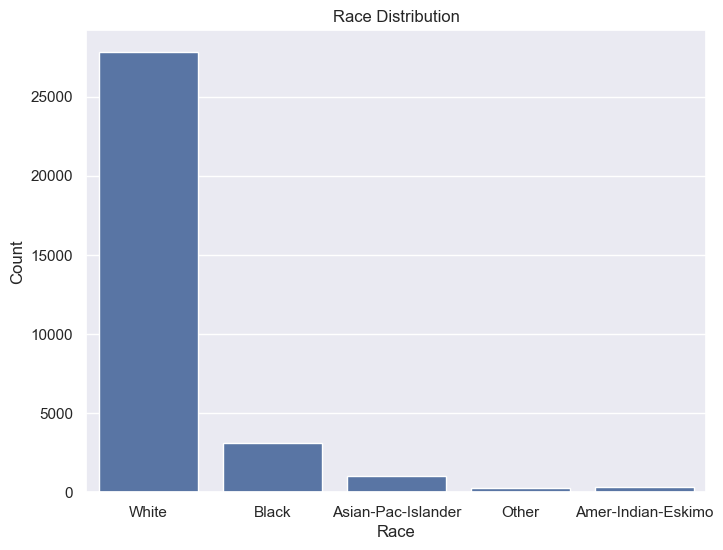

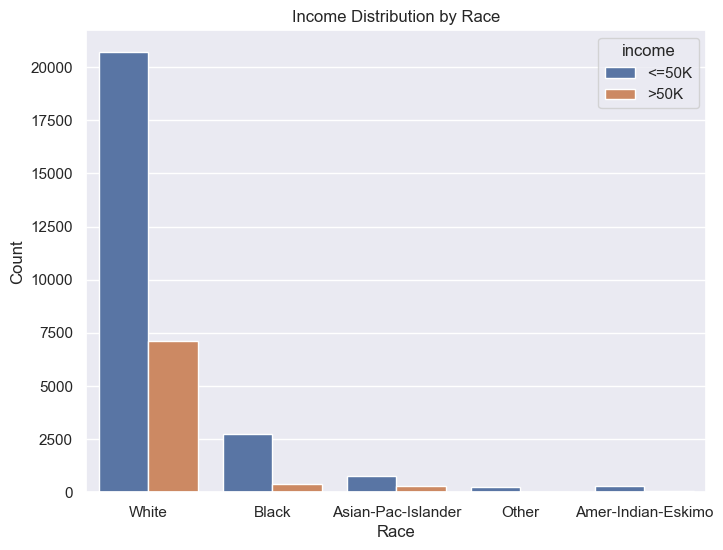

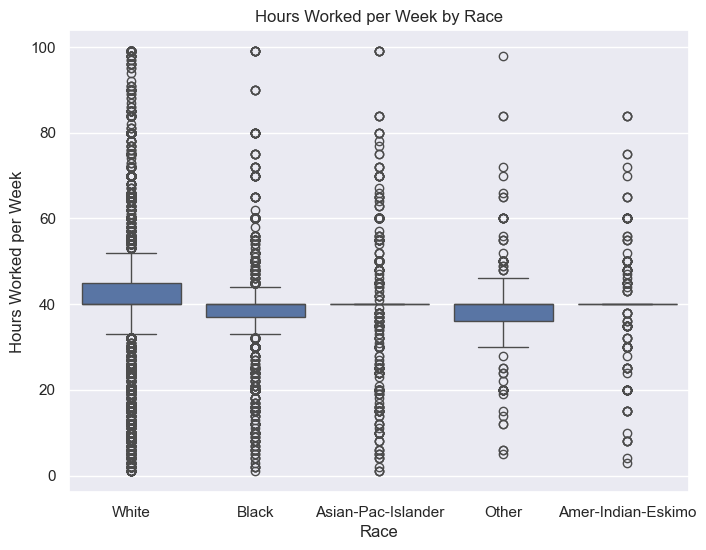

In [36]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for occurrences of '?' in columns like 'workclass' and 'occupation'
missing_data = data[['workclass', 'occupation']].apply(lambda x: x[x == '?'].count())
print("Missing Data in 'workclass' and 'occupation':\n", missing_data)

# 1. Race Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=data)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# 2. Income Distribution by Race
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='income', data=data)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# average number of hours worked by race
plt.figure(figsize=(8, 6))
sns.boxplot(x='race', y='hours.per.week', data=data)
plt.title('Hours Worked per Week by Race')
plt.xlabel('Race')
plt.ylabel('Hours Worked per Week')
plt.show()

#### Race Distribution: The first plot (sns.countplot) visualizes how many entries there are for each race in the dataset. There is a significant overrepresentation of the "White" race compared to others in the dataset. This suggests a potential sampling bias, where the dataset may not represent a balanced racial diversity.
#### Income Distribution by Race: This plot shows the distribution of income (<=50K and >50K) across different races, helping to spot potential biases in income. 
- The "White" racial group is overwhelmingly more represented in the dataset, both in total count and within each income category.
- Other racial groups like Black, Asian-Pac-Islander, and Amer-Indian-Eskimo have much fewer entries in the dataset, and their income distribution is highly skewed towards <=50k.
#### Boxplot for Hours Worked by Race: We could further explore how work hours vary across races to investigate potential biases.
- All of the racial groups seem to have similar median hours worked per week,hovering around 40 hours.
- The range of hours seems fairly consistent across the different races, but with more extreme outliers appearing for certain groups, especially the White race. This says that the white race individuals work significantly more and less that the others.
    

## Deeper dive with statistical measures
### Desciptive Statistics

In [8]:
# Frequency and Proportion of Racial Groups
race_counts = data['race'].value_counts()
race_proportions = data['race'].value_counts(normalize=True)

print("Race Counts:\n", race_counts)
print("\nRace Proportions:\n", race_proportions)


Race Counts:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

Race Proportions:
 race
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: proportion, dtype: float64


#### This sampling bias suggests that the dataset is not representative of a balanced racial distribution. The White group os overrepresentative.

### Chi-Square Test for Independence
    This can help assess whether there's a statistical significant relationship between two categorical variable (race and income).

In [11]:
from scipy.stats import chi2_contingency

# Contingency table of race vs income
contingency_table = pd.crosstab(data['race'], data['income'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi2 Statistic: 330.9204310085741
P-value: 2.305960610160958e-70
Degrees of Freedom: 4
Expected Frequencies:
[[  236.10822763    74.89177237]
 [  788.79886981   250.20113019]
 [ 2371.71094254   752.28905746]
 [  205.74060993    65.25939007]
 [21117.64135008  6698.35864992]]


#### Interpretation:
    The Chi-Square test indicates a strong statistical association between race an income in the dataset. The significant p-value confirms that race liekly plays a role in the distribution of income categories (<=50k and >50k. This is saying that the income distribution across races is not random. This suggests a potential racial bias in income levels which could be reflective of broader societal or economic factors.
### Proportional Analysis of Income by Race    
This method calculates the proportion of individuals within each race group who earn more than 50K. It helps to understand how income distribution varies across different racial groups. By converting the counts into proportions, we can compare the relative frequency of each income category (<=50K and >50K) within each race category.


In [34]:
# Calculate the proportion of individuals in each race who earn >50k
income_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Show the proportions of income groups by race
print("Proportions of Income by Race:\n", income_proportions)


Proportions of Income by Race:
 income                 <=50K      >50K
race                                  
Amer-Indian-Eskimo  0.884244  0.115756
Asian-Pac-Islander  0.734360  0.265640
Black               0.876120  0.123880
Other               0.907749  0.092251
White               0.744140  0.255860


### Key Insights:
- **Asian-Pac-Islander** and **White** have the highest proportions of individuals earning over 50k, with **25.59%** and **26.56%**, respectively.
- **Amer-Indian-Eskimo**, **Black**, and **Other** have the lowest proportions of individuals earning over 50k, with **11.58%**, **12.39%**, and **9.23%** respectively.

### Conclusion:
- **Asian-Pac-Islander** and **White** groups have relatively higher proportions of individuals earning more than 50k compared to other racial groups in this dataset.

### ANOVA (Analysis of Variance)
    ANOVA can be used to assess whether there are any statistically significant differences in the mean of a continuous variable (hours.per.week) between multiple categories (races). This will help identify if certain racial groups have significantly different work hours.

In [14]:
from scipy.stats import f_oneway

# ANOVA for hours worked per week across race groups
anova_results = f_oneway(data['hours.per.week'][data['race'] == 'White'],
                         data['hours.per.week'][data['race'] == 'Black'],
                         data['hours.per.week'][data['race'] == 'Asian-Pac-Islander'],
                         data['hours.per.week'][data['race'] == 'Other'],
                         data['hours.per.week'][data['race'] == 'Amer-Indian-Eskimo'])

print(f"ANOVA F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")


ANOVA F-statistic: 24.40791824971067, p-value: 3.367984877972419e-20


#### Interpretation:
    Given the very small p-value, we can confidently say that race does have an effect on the number of hours worked per week, with at least one group working a significantly different amount of hours compared to others. But which group differs from which? We will have to use Tukey's HSD test!

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey’s HSD test
tukey_results = pairwise_tukeyhsd(endog=data['hours.per.week'],  # dependent variable
                                  groups=data['race'],         # independent variable (groups)
                                  alpha=0.05)                  # significance level

# Display the results
print(tukey_results.summary())


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
Amer-Indian-Eskimo Asian-Pac-Islander   0.0788    1.0 -2.0952  2.2528  False
Amer-Indian-Eskimo              Black  -1.6254 0.1733 -3.6253  0.3745  False
Amer-Indian-Eskimo              Other  -0.5796   0.98 -3.3746  2.2154  False
Amer-Indian-Eskimo              White   0.6409 0.8926  -1.277  2.5587  False
Asian-Pac-Islander              Black  -1.7042 0.0011 -2.9087 -0.4996   True
Asian-Pac-Islander              Other  -0.6584 0.9356 -2.9526  1.6358  False
Asian-Pac-Islander              White   0.5621 0.5999 -0.5007  1.6248  False
             Black              Other   1.0458 0.6665 -1.0842  3.1757  False
             Black              White   2.2662    0.0  1.6316  2.9009   True
             Other              White   1.2205 0.4834 -0.8326  3.2735  False

#### Interpretation:
- The Black group works significatnly more hours than the White group.
- The Asian-Pac-Islander group works significantly fewer hours that the Black group, but there are no notable differences between the Asian-Pac-Islander and other groups.
- These results indicate that race influences the number of hours worked per week, with notable differences observed between specific groups, particularly between Black and White individuals.

## Summary of Analysis

### 1. Race Distribution:
- The dataset is **heavily skewed** towards the **White** racial group (85.4% of the data), with much smaller proportions of **Black** (9.6%), **Asian-Pac-Islander** (3.2%), and other racial groups.

### 2. Income Distribution by Race:
- A **Chi-Square test** revealed a statistically significant relationship between **race** and **income**, indicating that income levels vary significantly across racial groups.

### 3. ANOVA Results:
- The **ANOVA** test found significant differences in the **hours worked per week** across differ.** group.

### 4. Tukey’s HSD Test:
- Post-hoc analysis with **Tukey’s HSD** identified specific pairwise differences in work hours:
  - **Black vs. White**: Significant difference, with **Black** working more hours.
  - **Asian-Pac-Islander vs. Black**: Significant difference, with **Black** working more hours.
  
  No significant differences were found for other race pairings.

### Conclusion:
- **Race** does influence both **income** and **hours worked per week**, with the most significant differences observed between **Black** and **White** individuals.
